<a href="https://colab.research.google.com/github/Johncode-investment/stock-sentiment-analyzer/blob/main/5yr_sentiment_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter a stock ticker (e.g., AAPL, TSLA, RELIANCE.NS): TSLA 
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


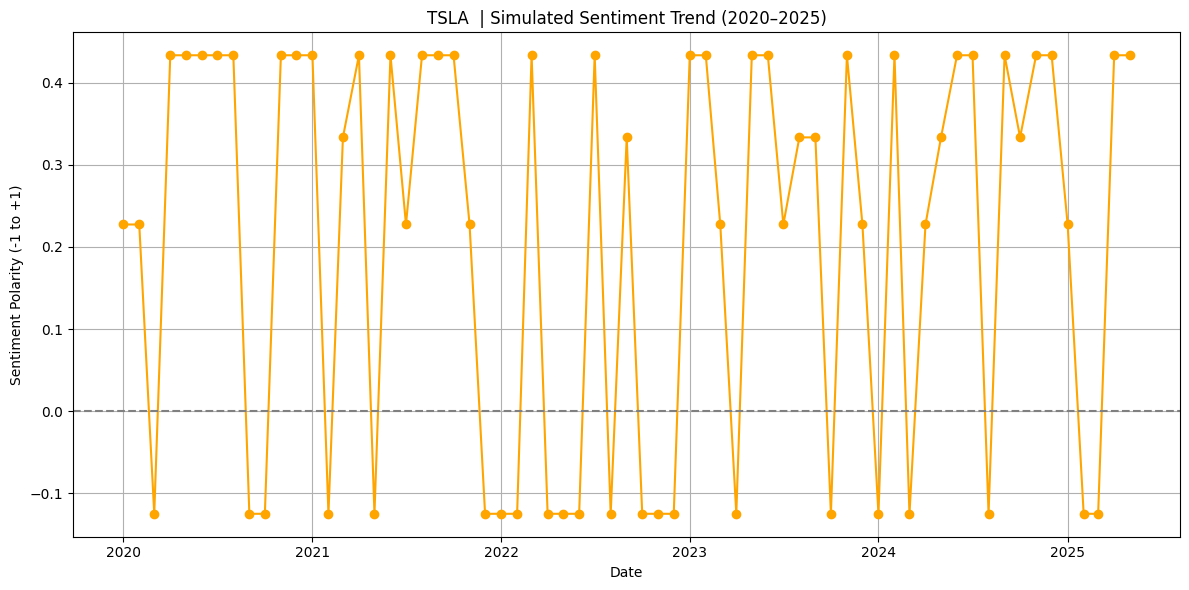

Price,Date,Close,% Change,Headline,Sentiment
Ticker,,TSLA,,,
55,2024-08-01,214.110001,-7.739047,Stock falls sharply amid bearish sentiment,-0.125000
56,2024-09-01,261.630005,22.194201,Strong rally as investors react to bullish out...,0.433333
57,2024-10-01,249.850006,-4.502541,Mild losses seen as market shows caution,0.333333
58,2024-11-01,345.160004,38.146886,Strong rally as investors react to bullish out...,0.433333
59,2024-12-01,403.839996,17.000809,Strong rally as investors react to bullish out...,0.433333
60,2025-01-01,404.600006,0.188196,Stable performance with positive investor tone,0.227273
61,2025-02-01,292.980011,-27.587739,Stock falls sharply amid bearish sentiment,-0.125000
62,2025-03-01,259.160004,-11.543452,Stock falls sharply amid bearish sentiment,-0.125000
63,2025-04-01,282.160004,8.874826,Strong rally as investors react to bullish out...,0.433333


In [1]:
# 📦 Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np

# 🔹 Ask user for input
stock = input("Enter a stock ticker (e.g., AAPL, TSLA, RELIANCE.NS): ")

# 🔹 Download stock data for last 5 years
df = yf.download(stock, start="2020-01-01", end="2025-06-01", interval='1mo')
df = df[['Close']].dropna().reset_index()

# 🔹 Simulate headlines using stock movement
def create_fake_headline(change):
    if change > 5:
        return "Strong rally as investors react to bullish outlook"
    elif change < -5:
        return "Stock falls sharply amid bearish sentiment"
    elif change < 0:
        return "Mild losses seen as market shows caution"
    else:
        return "Stable performance with positive investor tone"

df['% Change'] = df['Close'].pct_change() * 100
df['Headline'] = df['% Change'].apply(create_fake_headline)
df['Sentiment'] = df['Headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 🔹 Plot sentiment over time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Sentiment'], marker='o', linestyle='-', color='orange')
plt.axhline(0, linestyle='--', color='gray')
plt.title(f"{stock.upper()} | Simulated Sentiment Trend (2020–2025)")
plt.xlabel("Date")
plt.ylabel("Sentiment Polarity (-1 to +1)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔹 Show preview
df[['Date', 'Close', '% Change', 'Headline', 'Sentiment']].tail(10)
